In [109]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling
%matplotlib inline

In [110]:
df = pd.read_csv('census.csv')

In [111]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

### Fix columns format 

In [ ]:
#
df.columns =  df.columns.str.replace('-', '_').str.replace(' ', '')

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlgt           32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.workclass.str.replace(' ', '')

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
32556             Private
32557             Private
32558             Private
32559             Private
32560        Self-emp-inc
Name: workclass, Length: 32561, dtype: object

### remove space from columns values

In [ ]:
cat_features = [
    "workclass",
    "education",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native_country",
    "salary"
]

for col in cat_features:
    df[col] = df[col].str.replace(' ', '')

### Check data

In [ ]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

there is "?" in the values

In [ ]:
# looks like ? ref to unknown 
df.workclass = df.workclass.str.replace("?", "Unknown")
df.occupation = df.occupation.str.replace("?", "Unknown")
df.native_country = df.native_country.str.replace("?", "Unknown")

/var/folders/8p/6kpvf7ts1flg459z5pjvmrq80000gn/T/ipykernel_1581/2399832385.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.workclass = df.workclass.str.replace("?", "Unknown")
/var/folders/8p/6kpvf7ts1flg459z5pjvmrq80000gn/T/ipykernel_1581/2399832385.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.occupation = df.occupation.str.replace("?", "Unknown")
/var/folders/8p/6kpvf7ts1flg459z5pjvmrq80000gn/T/ipykernel_1581/2399832385.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.native_country = df.native_coun

In [ ]:
df.to_csv("clean_census.csv")

In [ ]:
## checking data 

In [ ]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
df.head()

,age,workclass,fnlgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.native_country.value_counts(True).mul(100)

United-States                 89.585701
Mexico                         1.974755
Unknown                        1.790486
Philippines                    0.608089
Germany                        0.420749
Canada                         0.371610
Puerto-Rico                    0.350112
El-Salvador                    0.325543
India                          0.307116
Cuba                           0.291760
England                        0.276404
Jamaica                        0.248764
South                          0.245693
China                          0.230337
Italy                          0.224195
Dominican-Republic             0.214981
Vietnam                        0.205768
Guatemala                      0.196554
Japan                          0.190412
Poland                         0.184270
Columbia                       0.181198
Taiwan                         0.156629
Haiti                          0.135131
Iran                           0.132060
Portugal                       0.113633


In [ ]:
df['sla_b'] = pd.get_dummies(df.salary, drop_first=True)

In [ ]:
# pd.crosstab(df.native_country == "United-States", columns="Us", values=df.sla_b, aggfunc="mean").plot(kind = "bar");

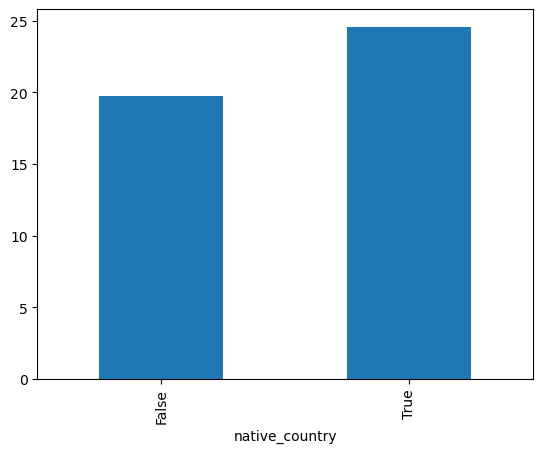

In [ ]:
df.groupby(df.native_country == "United-States")["sla_b"].mean().mul(100).plot(kind = "bar");

In [ ]:
df.groupby([df.native_country == "United-States", df.race])["sla_b"].mean().mul(100)

native_country  race              
False           Amer-Indian-Eskimo     6.666667
                Asian-Pac-Islander    27.844712
                Black                 12.328767
                Other                  8.450704
                White                 18.815490
True            Amer-Indian-Eskimo    11.824324
                Asian-Pac-Islander    23.287671
                Black                 12.394068
                Other                 10.077519
                White                 26.166036
Name: sla_b, dtype: float64

In [ ]:
df.groupby(df.race)["sla_b"].mean().mul(100)

race
Amer-Indian-Eskimo    11.575563
Asian-Pac-Islander    26.564004
Black                 12.387964
Other                  9.225092
White                 25.585994
Name: sla_b, dtype: float64

In [ ]:
df.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [ ]:
df.groupby(df.race == "Asian-Pac-Islander")['native_country'].value_counts(True).mul(100)[1]

native_country
United-States         28.103946
Philippines           18.094321
India                  8.180943
Unknown                7.988450
South                  7.410972
China                  7.025987
Vietnam                6.256015
Taiwan                 4.619827
Japan                  3.657363
Cambodia               1.732435
Laos                   1.732435
Hong                   1.636189
Thailand               1.539942
Iran                   0.577478
Germany                0.288739
Trinadad&Tobago        0.192493
Canada                 0.096246
Dominican-Republic     0.096246
England                0.096246
Greece                 0.096246
Haiti                  0.096246
Ireland                0.096246
Mexico                 0.096246
Poland                 0.096246
Portugal               0.096246
Puerto-Rico            0.096246
Name: native_country, dtype: float64

<AxesSubplot:>

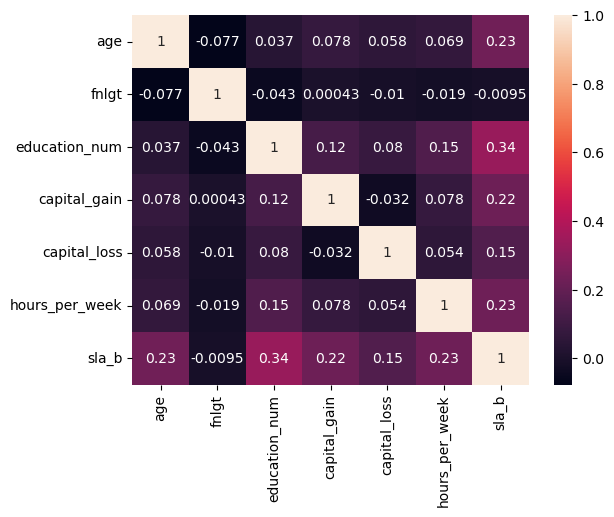

In [ ]:
sns.heatmap(df.corr(), annot=True)